In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  

In [3]:
df = pd.read_csv("PCOS_data.csv")
df.head()
df.info()
df.drop('Patient File No.', inplace=True, axis=1)
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [4]:
mean_value=df['Marraige Status (Yrs)'].mean()
df['Marraige Status (Yrs)'].fillna(value=mean_value, inplace=True)

In [5]:
mean_value1=df['Fast food (Y/N)'].mean()
df['Fast food (Y/N)'].fillna(value=mean_value1, inplace=True)

df.isnull().sum().sum()

0

In [6]:
df.keys()

Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'PCOS (Y/N)'],
      dtype='object')

In [7]:
x = df.drop(columns=['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['PCOS (Y/N)'], axis=1),
    df['PCOS (Y/N)'],
    test_size=0.3,
    random_state=0)
x_train.shape,x_test.shape

((378, 41), (163, 41))

Feature selection by feature importance using **Randomforestclassifier**

In [9]:
  sel=SelectFromModel(RandomForestClassifier(n_estimators= 100,random_state=0,n_jobs=-1))
  sel.fit(x_train,y_train)
  sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
        True,  True, False, False, False])

In [10]:
len(sel.get_support())
print(x_train.columns)

Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


In [11]:
f=x_train.columns[sel.get_support()]
print(f)

Index(['AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)'],
      dtype='object')


In [12]:
np.mean(sel.estimator_.feature_importances_)

0.02439024390243903

In [13]:
sel.estimator_.feature_importances_

array([0.01752352, 0.01948453, 0.01571873, 0.02310296, 0.00757878,
       0.00979385, 0.00431499, 0.01165668, 0.01235451, 0.02388226,
       0.01387779, 0.00314598, 0.00258944, 0.01592696, 0.00682428,
       0.0169181 , 0.02053972, 0.02404867, 0.01544363, 0.01510338,
       0.01318979, 0.02143674, 0.0377614 , 0.01917408, 0.01573416,
       0.01452905, 0.01379682, 0.04209359, 0.07487215, 0.06806884,
       0.0048789 , 0.01366986, 0.02482925, 0.00357457, 0.0035092 ,
       0.00373829, 0.11346931, 0.1836835 , 0.01757722, 0.01769791,
       0.01288662])

In [14]:
x_train_rfc=sel.transform(x_train)
x_test_rfc=sel.transform(x_test)

In [15]:
def run_randomForest (x_train, x_test, y_train, y_test):
   clf =RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
   clf.fit(x_train, y_train)
   y_pred =clf.predict(x_test)
   print('Accuracy: ', accuracy_score (y_test, y_pred))
run_randomForest(x_train_rfc,x_test_rfc,y_train, y_test)

Accuracy:  0.8650306748466258


**RFE**

In [16]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=9)
sel.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=9)

In [17]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False])

In [18]:
f=x_train.columns[sel.get_support()]
print(f)

Index(['LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)'],
      dtype='object')


In [19]:
x_train_rfe=sel.transform(x_train)
x_test_rfe=sel.transform(x_test)

In [20]:
def run_randomForest (x_train, x_test, y_train, y_test):
   clf =RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
   clf.fit(x_train, y_train)
   y_pred =clf.predict(x_test)
   print('Accuracy: ', accuracy_score (y_test, y_pred))
run_randomForest(x_train_rfe,x_test_rfe,y_train, y_test)

Accuracy:  0.8650306748466258


gradient boost **classifier**

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=0),n_features_to_select=9)
sel.fit(x_train,y_train)

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=9)

In [23]:
sel.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False])

In [24]:
f=x_train.columns[sel.get_support()]
print(f)

Index(['BMI', '  I   beta-HCG(mIU/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)'],
      dtype='object')


In [25]:
x_train_gb=sel.transform(x_train)
x_test_gb=sel.transform(x_test)

In [26]:
def run_randomForest (x_train, x_test, y_train, y_test):
   clf =RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
   clf.fit(x_train, y_train)
   y_pred =clf.predict(x_test)
   print('Accuracy: ', accuracy_score (y_test, y_pred))
run_randomForest(x_train_gb,x_test_gb,y_train, y_test)

Accuracy:  0.8711656441717791


In [27]:
x=df[['BMI', '  I   beta-HCG(mIU/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)']]
x.head()

,BMI,I beta-HCG(mIU/mL),TSH (mIU/L),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Follicle No. (L),Follicle No. (R)
0,19.3,1.99,0.68,2.07,0,0,0,3,3
1,24.9,60.80,3.16,1.53,0,0,0,3,5
2,25.3,494.08,2.54,6.63,0,0,0,13,15
3,29.7,1.99,16.41,1.22,0,0,0,2,2
4,20.1,801.45,3.57,2.26,0,0,0,3,4


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,df['PCOS (Y/N)'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((378, 9), (163, 9))

In [29]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3=  KNeighborsClassifier(n_neighbors=3)
model4 = svm.SVC(kernel='linear')
model5 = GaussianNB()
model1 = model1.fit(x_train, y_train)
model2 = model2.fit(x_train, y_train)
model3 = model3.fit(x_train, y_train)
model4 = model4.fit(x_train, y_train)
model5 = model5.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
model1_pred = model1.predict(x_test)  #LR
model1_acc = accuracy_score(y_test, model1_pred) *100
print("Accuracy:",model1_acc)
 
model2_pred = model2.predict(x_test)  #RF
model2_acc = accuracy_score(y_test, model2_pred)*100
print("Accuracy:",model2_acc)

model3_pred = model3.predict(x_test) #KNN
model3_acc = accuracy_score(y_test, model3_pred)*100
print("Accuracy:",model3_acc)

model4_pred = model4.predict(x_test) #SVM
model4_acc = accuracy_score(y_test, model4_pred)*100
print("Accuracy:",model4_acc)

model5_pred = model5.predict(x_test)   #NB
model5_acc = accuracy_score(y_test, model5_pred)*100
print("Accuracy:",model5_acc)

Accuracy: 88.95705521472392
Accuracy: 87.73006134969326
Accuracy: 76.07361963190185
Accuracy: 87.73006134969326
Accuracy: 85.88957055214725


In [31]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[ ('lr', model1), ('rf', model2),('knn', model3),('svn', model4),('nb', model5)], voting='hard' )


final_model.fit(x_train,y_train)

y_pred = final_model.predict(x_test)

vot_acc  = accuracy_score(y_test, y_pred)*100

print(vot_acc)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


89.57055214723927


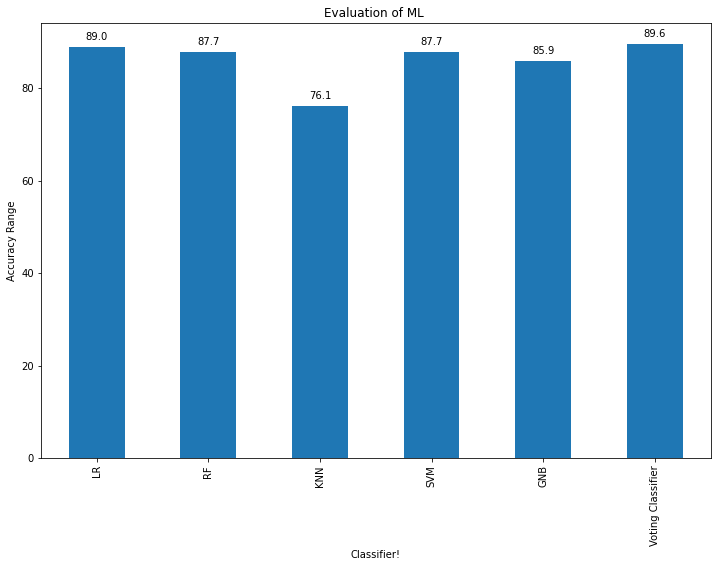

In [32]:
import matplotlib.pyplot as plt

frequencies = [model1_acc,model2_acc,model3_acc,model4_acc,model5_acc,vot_acc]

freq_series = pd.Series(frequencies)

x_labels = ['LR','RF','KNN','SVM','GNB','Voting Classifier']

plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML ')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

       
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)

       
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        
add_value_labels(ax)
plt.show()

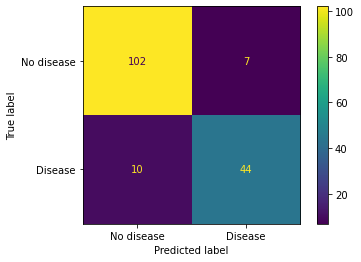

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred,labels=[0,1])

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No disease','Disease'])
cm_disp.plot()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
input_data = (25.3,494.08,2.54,6.63,0,0,0,13,15)
#25.3,494.08,2.54,6.63,0,0,0,13,15
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [36]:
print("Classification report for LR")
m1=model1.predict(x_test)
print(classification_report(y_test, m1))

print("Classification report for RF")
m2=model2.predict(x_test)
print(classification_report(y_test, m2))

print("Classification report for KNN")
m3=model3.predict(x_test)
print(classification_report(y_test, m3))

print("Classification report for SVM")
m4=model4.predict(x_test)
print(classification_report(y_test, m4))

print("Classification report for NB")
m5=model5.predict(x_test)
print(classification_report(y_test, m5))

print("Classification report for Ensembling")

predictions= final_model.predict(x_test)
print(classification_report(y_test, predictions))

Classification report for LR
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       109
           1       0.83      0.83      0.83        54

    accuracy                           0.89       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.89      0.89      0.89       163

Classification report for RF
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       109
           1       0.81      0.81      0.81        54

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163

Classification report for KNN
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       109
           1       0.68      0.52      0.59        54

    accuracy                           0.76       163
   macro avg       0.73      0.70      0

In [37]:
from joblib import dump

dump(final_model,'pcos_model')


['pcos_model']